
نام پروژه:آشنایی با هوش مصنوعی
    
هدف از انجام پروژه : پر کردن یک دیتاست بعد از به دست آوردن یک مدل آماری به شیوه پیش بینی می باشد
    
توضیح پروژه: در این پروژه داده های مربوط به تعدادی از کاربران سایت در فایلی داده شده است. اطلاعات بعضی سلول ها در این فایل داده شده را از دست داده ایم که لازم است آن ها را با میانگین ستون مربوط به آن سلول پر کنیم(البته غیر از ستون هدف)ستون آخر ستون هدف است و در آن اطلاعاتی مربوط به این که کاربر مورد نظر روی آگهی کلیک کرده است یا نه را در بر دارد ولی بعضی از سلول های این ستون خالی است و اطلاعات آن درج نشده است. در این پروژه در ابتدا می خواهیم بدانیم کدام یک از ویژگی ها که در ستون های مختلف این فایل قرار دارد بهتر است به عنوان ورودی مدل آماری ما انتخاب شود که بر اساس آن خانه های خالی ستون هدف را پیش بینی کنیم و با توجه به آن ویژگی حدس بزنیم که کاربر مورد نظر روی آگهی کلیک کرده است یا نه


در ابتدا لازم است که اطلاعات داده شده در فایل را بخوانیم و در دیتافریمی قرار دهیم که بتوان با آطلاعات درون آن کار کرد

سپس با استفاده از تابع زیر می توانیم پنج سطر اول دیتافریم خود را ببینیم

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import time
import scipy.stats as stats
import csv 
data = pd.read_csv('advertising_dataset.csv')
data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0


با استفاده از تابع زیر می توان پنج سطر آخر دیتافریم خود را ببینیم


In [2]:
data.tail() 

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
995,995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0.0
999,999,NaN,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Female,Brazil,2016-06-03 21:43:21,1.0


با استفاده از این تابع می توان خلاصه ای از داده های آیتم ها را مشاهده کرد هم چنین می توان میانگین و واریانس و کوچک ترین مقدار و بزرگ ترین مقدار را برای ستون هایی که شامل مقادیر عددی اند مشاهده نمود


In [3]:
data.describe() 

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1000.000000,907.000000,979.000000,1000.000000,913.000000,832.000000
mean,499.500000,64.794818,36.009193,55000.000080,179.751271,0.496394
std,288.819436,15.954841,8.783636,13414.634022,43.957934,0.500288
min,0.000000,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,249.750000,50.615000,29.000000,47031.802500,138.550000,0.000000
50%,499.500000,67.940000,35.000000,57012.300000,183.480000,0.000000
75%,749.250000,78.555000,42.000000,65470.635000,217.850000,1.000000
max,999.000000,91.430000,61.000000,79484.800000,269.960000,1.000000


با استفاده از تابع زیر می توان نوع هرکدام از ستون های داده ای را مشاهده کرد
همان طور که از نتایج به دست آمده می توان فهمید بعضی از داده هااز نوع عددی و بعضی دیگر از نوع غیر عددی می باشند . برای پردازش ستون های غیرعددی یکی از راهکار های ممکن استفاده از روش برچسب گزاری می باشد

In [4]:
data.info(verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  907 non-null    float64
 2   Age                       979 non-null    float64
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      913 non-null    float64
 5   Ad Topic Line             1000 non-null   object 
 6   City                      1000 non-null   object 
 7   Gender                    1000 non-null   object 
 8   Country                   1000 non-null   object 
 9   Timestamp                 1000 non-null   object 
 10  Clicked on Ad             832 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


در این قسمت می خواهیم از روش برچسب گزاری برای داده های ستون جنسیت استفاده کنیم.مقادیر موجود در سلول های این ستون زن و مرد می باشد و حالا می خواهیم مقادیر این ستون را با مقادیر 0 و 1 جایگزین کنیم به صورتی که 0 نشان دهنده زن و 1 نشان دهنده مرد باشد

استفاده کردcat.codes برای این کار در ابتدا نوع داده ای ستون جنسیت را به صورت زیر تغییر داده شده است تا بتوان از توابعی مانند  
  استفاده کرد replace نیز انجام داد یا از تابعی مانند if conditionالبته می توان این کار را با یک ساختار 

In [5]:
data["Gender"] = data["Gender"].astype('category')
data.info(verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unnamed: 0                1000 non-null   int64   
 1   Daily Time Spent on Site  907 non-null    float64 
 2   Age                       979 non-null    float64 
 3   Area Income               1000 non-null   float64 
 4   Daily Internet Usage      913 non-null    float64 
 5   Ad Topic Line             1000 non-null   object  
 6   City                      1000 non-null   object  
 7   Gender                    1000 non-null   category
 8   Country                   1000 non-null   object  
 9   Timestamp                 1000 non-null   object  
 10  Clicked on Ad             832 non-null    float64 
dtypes: category(1), float64(5), int64(1), object(4)
memory usage: 79.3+ KB


بعد از تعویض نوع داده ای ستون جنسیت به وسیله تابع زیر آن را کد می کنیم.همان طور که پیش تر گفته شد از روش های دیگری که ذکر شد نیز می توان استفاده نمود.برای مشاهده درستی این کار پنج عنصر اول دیتافریم را چاپ می کنیم و همان طور که پیداست داده های ستون جنسیت به درستی با 0 و 1 جایگزین شده اند 

In [6]:
data["Gender"] = data["Gender"].cat.codes
data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


 مشخص شده اند که این مقدار نشان دهنده این است که اطلاعات آن سلول را از دست داده ایم و گم شده است حالا می خواهیم NAN در فایل داده شده به ما تعدادی از سلول های ستون ها ببینیم که هر ستون دارای چند خانه با این مقدار است برای این کار به صورت زیر عمل می کنیم. همان طور که از نتیجه پیداست برای هر آیتم از جدول نشان داده شده است که این ستون  چند مقدار گم شده دارد

In [7]:
data.isna().sum()

Unnamed: 0                    0
Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

برای مشاهده میانگین هر ستون از جدول به صورت زیر عمل می کنیم

In [8]:
data.mean()

Unnamed: 0                    499.500000
Daily Time Spent on Site       64.794818
Age                            36.009193
Area Income                 55000.000080
Daily Internet Usage          179.751271
Gender                          0.481000
Clicked on Ad                   0.496394
dtype: float64

در این قسمت می خواهیم خانه های خالی هر ستون را با مقدار میانگین داده ها در آن ستون جایگزین نماییم.  البته این کار برای همه ی ستون های جدول به غیر از ستون هدف انجام می شود. برای تشخیص خالی بودن سلول و جایگزین کردن آن با میانگین از توابع زیر استفاده می کنیم.در صورتی که آن خانه از جدول خالی بود آن را با میانگین آن ستون از جدول جایگزین می نماییم.برای ارزیابی درستی این کار پنج سطر اول دیتافریم را چاپ می کنیم   

In [9]:
data['Unnamed: 0'].fillna((data['Unnamed: 0'].mean()), inplace=True)
data['Daily Time Spent on Site'].fillna((data['Daily Time Spent on Site'].mean()), inplace=True)
data['Age'].fillna((data['Age'].mean()), inplace=True)
data['Area Income'].fillna((data['Area Income'].mean()), inplace=True)
data['Daily Internet Usage'].fillna((data['Daily Internet Usage'].mean()), inplace=True)
data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.090000,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,179.751271,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.500000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.890000,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.580000,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


برای پر کردن سلول های خالی موجود در یک دیتافریم می توان از راه های مختلفی استفاده کرد. در این پروژه برای جایگزین کردن مقادیر خالی در جدول ها از میانگین هر ستون استفاده شده است. راهکار های دیگری که در این زمینه وجود دارند عبارت اند از جایگزین کردن سلول های خالی با میانه هر ستون یا جایگزین کردن همه ی مقادیر از دست داده شده با مقدار ثابت مشخصی و یا جایگزین کردن آن ها با بیش ترین مقداری که در آن ستون تکرار شده است.یکی از تفاوت هایی که این دو روش آخر ذکر شده با روش اول گفته شده و روش استفاده شده در پروژه دارد در این است که میانگین و میانه و چییز هایی از این قبیل فقط برای داده های عددی کاربرد دارند و اگر خانه های خالی جدول در ستون های غیر عددی نیز موجود باشند در ابتدا باید آن هارا به حالت عددی درآورد و سپس میانگین یا میانه آن هارا جایگزین نمود اما در روشی که بیش ترین داده ی تکرار شده در ستون و یا یک مقدار مشخص جایگزین می شوداین مشکل برای ستون های غیر عددی وجود نخواهد داشت 

با استفاده از توابع زیر می توان تعداد کاربران زن و مرد را مشخص نمود . همان طور که پیداست 519 نفر از کاربران  زن و 481 نفر از آن ها مرد می باشند 

In [10]:
data.groupby(['Gender']).count()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Timestamp,Clicked on Ad
Gender,,,,,,,,,,
0,519,519,519,519,519,519,519,519,519,423
1,481,481,481,481,481,481,481,481,481,409


با استفاده از همان تابع که در مرحله قبل نیز استفاده شد می توان تعداد کسانی که روی آگهی کلیک کرده اند و نکرده اند را تعیین نمود. همان طور که از نتایج پیداست  419 نفر روی آگهی کلیک کرده نکرده اند و 413 نفر روی آن کلیک کرده اند و این به آن معناست که در جمع مقادیر 832 خانه از این ستون پر شده است و باقی خانه ها اطلاعاتشان گم شده است و می خواهیم در این پروژه آن هارا پیش بینی کنیم

In [11]:
data.groupby(['Clicked on Ad']).count()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp
Clicked on Ad,,,,,,,,,,
0.0,419,419,419,419,419,419,419,419,419,419
1.0,413,413,413,413,413,413,413,413,413,413


در این مرحله می خواهیم تعداد کاربرانی را که سنشان از 21 بیش تر است و جنسیت آن ها زن است را پیدا کنیم.در نتیجه باید برای ستون های سن و جنسیت شرط قرار دهیم و تمام کاربرانی را که این دو شرط برای آن ها برقرار است را بشماریم که به این منظور از تابع زیر استفاده می کنیم 

In [12]:
data[(data.Age > 21) & (data.Gender == 0)].count()

Unnamed: 0                  514
Daily Time Spent on Site    514
Age                         514
Area Income                 514
Daily Internet Usage        514
Ad Topic Line               514
City                        514
Gender                      514
Country                     514
Timestamp                   514
Clicked on Ad               418
dtype: int64

میانگین سن کاربرانی را که روی آگهی کلیک کرده اند یا نکرده اند را بیابیم vectorization در اینجا می خواهیم به وسیله 

هم چنین می خواهیم مدت زمانی که برای محاسبه این کار لازم است را به میلی ثانیه محاسبه کنیم
برای این کار باید ستون هدف را با توجه به مقادیری که می پذیرد که در اینجا 0 و 1 است دسته بندی کنیم

In [13]:
start_t1=time.time()
data.groupby(['Clicked on Ad']).mean()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender
Clicked on Ad,,,,,,
0.0,489.472554,75.644958,31.723326,61390.286802,211.848555,0.505967
1.0,504.515738,54.283823,40.295600,48311.036247,148.108473,0.476998


همان طور که از نتیجه پیداست زمانی که برای پیدا کردن میانگین سن کاربرانی که روی آگهی کلیک کرده اند و یا نکرده اند به وسیله ی این روش مقدار ناچیزی است 

In [14]:
finish_t1=time.time()
print("vectorization time is :",(finish_t1-start_t1)*1000,"ms")

vectorization time is : 122.57647514343262 ms


به همان منظور ولی این دفعه به وسیله ی حلقه می خواهیم میانگین سن را برای کاربران محاسبه کنیم در نتیجه لازم است که هر سلول از ستون هدف را بررسی کرده و دو شمارنده داشته باشیم. در جاهایی که مقدار سلول برابر 0 باشد به شمارنده اول  مقدار سن همان کاربر و جاهایی که 1 باشد به شمارنده دوم مقدار سن آن کاربر را اضافه می کنیم تا در آخر در شمارنده ها مجموع سن کاربرانی که روی آگهی کلیک نکرده اند و کاربرانی که روی آگهی کلیک کرده اند را داشته باشیم . پس از آن کافیست این شمارنده ها را که نشان دهنده مجموع سن های کاربران در دوحالت کلیک کرده و نکرده می باشند را به تعداد کاربرانی که کلیک کرده اند و کاربرانی که کلیک نکرده اند تقسیم کنیم تا بتوانیم میانگین را برای هریک از دو حالت گفته شده به دست آوریم. تعداد کاربرانی که روی آگهی کلیک کرده اند و کاربرانی که روی آگهی کلیک نکرده اند را در مراحل بالاتر به دست آوردیم و از نتایج آن ها در این مرحله استفاده شده است. همان طور که می بینیم نتایج به دست آمده که همان میانگین سنی می باشند با نتایج روش قبلی همخوانی دارد که این نشان دهنده درستی عملکرد این ثسمت می باشد
هم چنین در این جا هم مانند مرحله قبل زمانی را که لازم است این کار را انجام بدهیم محاسبه کرده ایم تا بتوانیم این دو روش استفاده شده برای به دست آوردن میانگین را با هم از نظر به صرفه بودن زمانی مقایسه کنیم. همان طور که پیداست زمان لازم به این منظور در برابر زمانی که روش پیشین داشت عدد بزرگی است و تقریبا 8 برابر روش پیش می باشد . در نتیجه می توان نتیجه گرفت که استفاده از روش پیشین در بررسی داده ها بسیار به صرفه تر می باشد

In [15]:
sum1=0
sum2=0
start_t1=time.time()
for index, row in data.iterrows():
    if(row['Clicked on Ad']==0.0):
        sum1=sum1+row['Age']
    if(row['Clicked on Ad']==1.0):
        sum2=sum2+row['Age']
mean1=sum1/419
mean2=sum2/413
finish_t1=time.time()
print("mean1 is:",mean1," ","mean2 is:",mean2)
print("vectorization time is :",(finish_t1-start_t1)*1000,"ms")

mean1 is: 31.723325881701896   mean2 is: 40.295599848637366
vectorization time is : 154.42228317260742 ms


در اینجا شکل توزیع هر ستون عددی از داده ها را با کمک تابع زیر میبینیم که برای هر نمودار محور افقی نشان دهنده مقادیری است که آن آیتم می پذیرد و محور عمودی نشان دهنده تعدادی از کاربران است که در آن بازه مشخص وجود دارند

array([[<AxesSubplot:title={'center':'Daily Time Spent on Site'}>]],
      dtype=object)

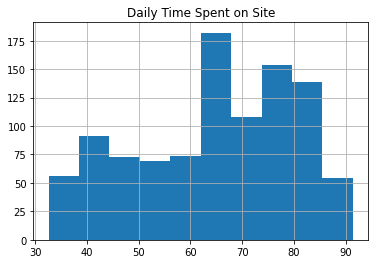

In [16]:
data.hist(column='Daily Time Spent on Site')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

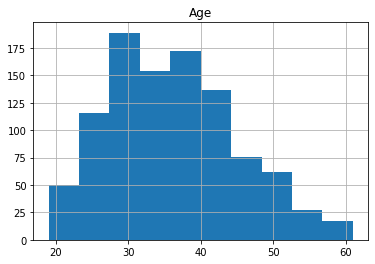

In [17]:
data.hist(column='Age')

array([[<AxesSubplot:title={'center':'Area Income'}>]], dtype=object)

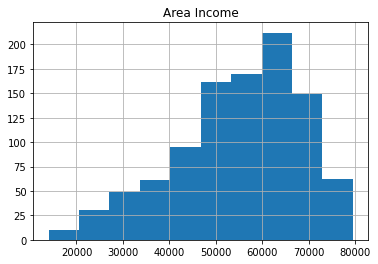

In [18]:
data.hist(column='Area Income')

array([[<AxesSubplot:title={'center':'Daily Internet Usage'}>]],
      dtype=object)

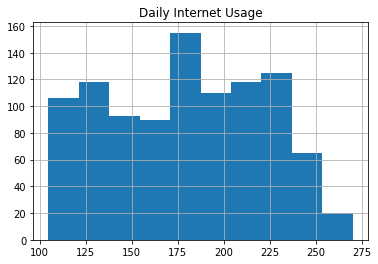

In [19]:
data.hist(column='Daily Internet Usage')

In [20]:
#plt.hist(data['Ad Topic Line'])
#plt.title('Ad Topic Line')
#data.hist(column='Ad Topic Line')

In [21]:
#plt.hist(data['City'])
#plt.title('City')
#data.hist(column='City')

array([[<AxesSubplot:title={'center':'Gender'}>]], dtype=object)

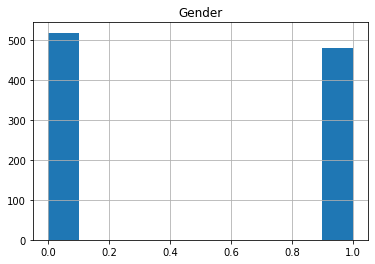

In [22]:
data.hist(column='Gender')

In [23]:
#plt.hist(data['Country'])
#plt.title('Country')
#data.hist(column='Country')

In [24]:
#plt.hist(data['Timestamp'])
#plt.title('Timestamp')
#data.hist(column='Timestamp')

array([[<AxesSubplot:title={'center':'Clicked on Ad'}>]], dtype=object)

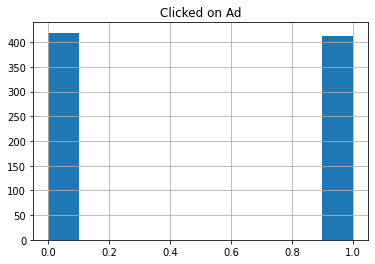

In [25]:
data.hist(column='Clicked on Ad')

یکی از راه های بهبود داده ها برای مدل های یادگیری ماشین ، نرمال سازی داده ها می باشد. برای نرمال سازی داده ها می توان از توابعی که در پایتون به این منظور وجود دارد استفاده کرد ولی در اینجا نرمال سازی داده ها به وسیله کم کردن میانگین و تقسیم بر انحراف معیار انجام شده است. برای محاسبه میانگین و انحراف معیار هر ستون از توابع مربوط به آنان استفاده شده است. در 4 بخش بعدی این کار برای ستون هایی از فایل که دارای مقدار عددی اند به غیر از ستون جنسیت و ستون هدف به صورت جداگانه انجام شده است. البته برای این کار می شود از یک حلقه نیز روی ستون ها با آیتم های مختلف نیز استفاده شود

In [26]:
data['Daily Time Spent on Site'] = (data['Daily Time Spent on Site'] - data['Daily Time Spent on Site'].mean())/data['Daily Time Spent on Site'].std()
data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,0.273474,35.0,61833.90,256.090000,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,1.015870,31.0,68441.85,179.751271,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,0.307698,26.0,59785.94,236.500000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,0.615713,29.0,54806.18,245.890000,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,0.235301,35.0,73889.99,225.580000,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


In [27]:
data['Age'] = (data['Age'] - data['Age'].mean())/data['Age'].std()
data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,0.273474,-0.116122,61833.90,256.090000,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,1.015870,-0.576377,68441.85,179.751271,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,0.307698,-1.151696,59785.94,236.500000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,0.615713,-0.806505,54806.18,245.890000,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,0.235301,-0.116122,73889.99,225.580000,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


In [28]:
data['Area Income'] = (data['Area Income'] - data['Area Income'].mean())/data['Area Income'].std()
data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,0.273474,-0.116122,0.509436,256.090000,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,1.015870,-0.576377,1.002029,179.751271,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,0.307698,-1.151696,0.356770,236.500000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,0.615713,-0.806505,-0.014448,245.890000,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,0.235301,-0.116122,1.408163,225.580000,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


In [29]:
data['Daily Internet Usage'] = (data['Daily Internet Usage'] - data['Daily Internet Usage'].mean())/data['Daily Internet Usage'].std()
data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,0.273474,-0.116122,0.509436,1.817578,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,1.015870,-0.576377,1.002029,0.000000,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,0.307698,-1.151696,0.356770,1.351152,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,0.615713,-0.806505,-0.014448,1.574722,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,0.235301,-0.116122,1.408163,1.091154,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


برای هر یک از حالت هایی که کاربر روی آگهی کلیک کرده است یا نکرده است میانگین هر یک از ویژگی های عددی محاسبه شده است

In [30]:
data.groupby(['Clicked on Ad']).mean()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender
Clicked on Ad,,,,,,
0.0,489.472554,0.714104,-0.493148,0.476367,0.764216,0.505967
1.0,504.515738,-0.691783,0.493211,-0.498632,-0.753395,0.476998


برای هر یک از حالت هایی که کاربر روی آگهی کلیک کرده است یا نکرده است انحراف معیار هر یک از ویژگی های عددی محاسبه شده است

In [31]:
data.groupby(['Clicked on Ad']).std()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender
Clicked on Ad,,,,,,
0.0,281.453594,0.531369,0.706315,0.670476,0.592058,0.500562
1.0,298.942388,0.836161,1.019268,1.046199,0.723959,0.500076


در این مرحله می خواهیم تابع چگالی احتمال توزیع نرمال را برای تمامی ویژگی های عددی رسم کنیم و طبق صورت پروژه باید هر دو نمودار مربوط به کلیک و عدم کلیک ، برای هر ویژگی در یک نمودار رسم شوند که بتوان آن ها را باهم مقایسه کرد و موقعیت زمانی آن هارا نسبت به هم بسنجیم تا در نهایت بتوانیم ویژگی ای که به عنوان ورودی به مدل آماری ما داده می شود تا بتوانیم خانه های خالی ستون هدف را پر کنیم را انتخاب کنیم. به این منظور در ابتدا اطلاعات مربوط به همه ی کاربرانی را که روی آگهی کلیک کرده اند را در یک دیتاست و اطلاعات مربوط به کاربرانی که روی آگهی کلیک نکرده اند را هم در یک دیتاست دیگر میریزیم. حالا برای هر ویژگی ای که می خواهیم نمودار آن را رسم کنیم از دیتافریم های جدیدی که ساخته ایم استفاده می کنیم . برای رسم تابع چگالی احتمال توزیع نرمال از تابع زیر استفاده می کنیم و با استفاده از میانگین و انحراف معیار آن ستون موردنظر نمودار را رسم می کنیم 

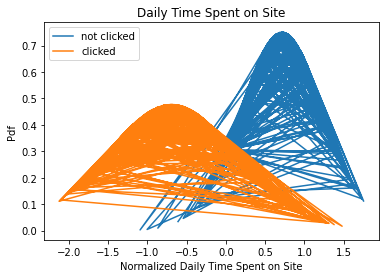

In [32]:
df_0=data[data['Clicked on Ad']==0.0]
df_1=data[data['Clicked on Ad']==1.0]
x0=df_0['Daily Time Spent on Site']
x1=df_1['Daily Time Spent on Site']
plt.plot(x0, stats.norm.pdf(x0, x0.mean(), x0.std()),label = "not clicked")
plt.xlabel('Normalized Daily Time Spent on Site')
plt.ylabel('Pdf')
plt.plot(x1, stats.norm.pdf(x1, x1.mean(), x1.std()),label = "clicked")
plt.title('Daily Time Spent on Site')
plt.legend()
plt.show()

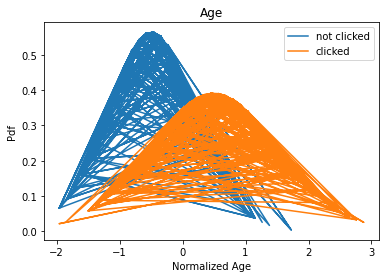

In [33]:
df_0=data[data['Clicked on Ad']==0.0]
df_1=data[data['Clicked on Ad']==1.0]
x0=df_0['Age']
x1=df_1['Age']
plt.plot(x0, stats.norm.pdf(x0, x0.mean(), x0.std()),label = "not clicked")
plt.xlabel('Normalized Age')
plt.ylabel('Pdf')
plt.plot(x1, stats.norm.pdf(x1, x1.mean(), x1.std()),label = "clicked")
plt.title('Age')
plt.legend()
plt.show()


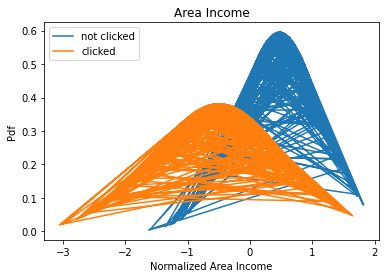

In [34]:
df_0=data[data['Clicked on Ad']==0.0]
df_1=data[data['Clicked on Ad']==1.0]
x0=df_0['Area Income']
x1=df_1['Area Income']
plt.plot(x0, stats.norm.pdf(x0, x0.mean(), x0.std()),label = "not clicked")
plt.xlabel('Normalized Area Income')
plt.ylabel('Pdf')
plt.plot(x1, stats.norm.pdf(x1, x1.mean(), x1.std()),label = "clicked")
plt.title('Area Income')
plt.legend()
plt.show()

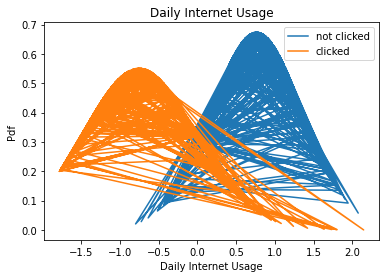

In [35]:
df_0=data[data['Clicked on Ad']==0.0]
df_1=data[data['Clicked on Ad']==1.0]
x0=df_0['Daily Internet Usage']
x1=df_1['Daily Internet Usage']
plt.plot(x0, stats.norm.pdf(x0, x0.mean(), x0.std()),label = "not clicked")
plt.xlabel('Daily Internet Usage')
plt.ylabel('Pdf')
plt.plot(x1, stats.norm.pdf(x1, x1.mean(), x1.std()),label = "clicked")
plt.title('Daily Internet Usage')
plt.legend()
plt.show()

حال باید از بین این چهار ویژگی یک ویژگی را انتخاب کنیم که بر اساس میانگین و واریانس آن  ویژگی مقادیر خالی در ستون هدف را پیش بینی کنیم. که در این پروژه ویژگی انتخاب شده 

می باشد که میانگین و انحراف معیار آن برای هر دو حالت کلیک و عدم کلیک محاسبه شده استDaily Internet Usage طبق نمودار های به دست آمده 

برای بیان چرایی انتخاب این ویژگی به عنوان ورودی مدل آماری می توان گفت که همان طور که از نمودار تابع چگالی احتمال برای هر دو حالت کلیک و عدم کلیک می توان دید ، این دو نمودار اشتراک کم تری نسبت به هم دارند (نسبت به نمودار ویژگی های دیگر)و هم چنین قله های این دو نمودار که در آن جا تراکم داده ها بسیار زیاد است از هم فاصله زیادی دارند پس این موضوع میزان خطا را در پیش بینی کردن کاهش می دهد. در این پیش بینی قطعا خطا وجود خواهد داشت چرا که دو نمودار باهم تلاقی و اشتراک دارند و اگر بازه ی مصرف اینترنت روزانه برای کاربری در بازه ی اشتراکی بین این دو نمودار قرار بگیرد احتمال این وجود دارد که ما در پیش بینی کلیک یا عدم کلیک دچار مشکل و خطا شویم اما به دلیل این که نسبت به بقیه ویژگی ها دو نمودار اشتراک کم تری دارند این ویژگی به عنوان ورودی مدل انتخاب شده است


In [36]:
print("mean for unclicked is:",x0.mean(),"std for unclicked is:",x0.std())
print("mean for clicked is:",x1.mean(),"std for clicked is:",x1.std())

mean for unclicked is: 0.7642163719611866 std for unclicked is: 0.592057888773502
mean for clicked is: -0.7533953136510781 std for clicked is: 0.7239588576012945



حالا برای پیش بینی کردن سلول های خالی ستون هدف می بایست نقطه تلاقی این دو نمودار را پیدا نمود که این کار را می توان به وسیله ی توابع ریاضی موجود در کتاب خانه های پایتون با استفاده از مساوی قرار دادن ضابطه دو نمودار که همان تابع گوسی است (با در نظر ئاشتن این موضوع که هم میانگین را داریم و هم انحراف معیار)انجام داد. اما از آن جایی که استفاده از کتاب خانه هایی غیر از کتاب خانه هایی که در صورت پروژه آمده است غیر مجاز است محل تلاقی این دو نمودار به صورت چشمی برابر 0 در نظر گرفته شده است

حالا طبق نمودار اگر مقدار نرمالایز شده ی ستون مصرف اینترنت روزانه برای کاربری از 0 بیش تر باشد و در صورتی که ستون هدف آن خالی باشد می توان اینگونه پیش بینی نمود که کاربر روی آگهی کلیک نکرده است و اگر مقدار نرمالایز شده ی ستون مصرف اینترنت روزانه برای کاربری از 0 کم تر باشد و ستون هدف آن خالی باشد می توان این گونه پیش نمود که  روی آگهی کلیک نکرده است که برای این کار از ساختار دستور شرطی روی دیتافریم استفاده شده است و هم چنین ستونی به نام پیش بینی تعریف شده است که با مقادیر کلیک یا عدم کلیک پر خواهد شد(برای سطر هایی که ستون هرف آن ها خالی می باشد)

In [37]:
data.loc[(data['Daily Internet Usage']>=0.0)&(data['Clicked on Ad'].isnull()==True),'predict'] = 'not clicked' 
data.loc[(data['Daily Internet Usage']<0.0)&(data['Clicked on Ad'].isnull()==True),'predict'] = 'clicked' 
#data.head(35)

در این مرحله از دیتافریم از آن جایی که فقط به ستون های پیش بینی و اندیس نیازمندیم همه ی ستون های دیگر را حذف می کنیم و سطر هایی که مربوط به کاربرانی است که از قبل مشخص بوده اند که روی آگهی کلیک کرده اند یا خیر را حذف می کنیم (که این سطر همان سطر هایی اند که سلول مربوط به ستون پیش بینی آن ها خالی است)و سپس آن را در فایلی میریزیم . سپس برای مشاهده نتیجه کار اطلاعات فایل جدیدی را که ساخته ایم می خوانیم و آن را در یک دیتافریم جدید میریزیم و برای مشاهده نتیجه بیست های اول آن را چاپ می کنیم. همان طور که میبینیم ستون پیش بینی برای آن ها پر شده و اندیس آن ها نیز مشخص شده است  

In [38]:
data.drop(columns=['Unnamed: 0','Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Ad Topic Line','City','Gender','Country','Timestamp','Clicked on Ad'], axis=1, inplace=True)
data.dropna(subset=['predict']).to_csv('result.csv')
#data.dropna(subset=['predict']).to_csv('result.csv')
df=pd.read_csv('result.csv')
#df.drop(columns=['Unnamed: 0.1', 'Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Ad Topic Line','City','Gender','Country','Timestamp','Clicked on Ad'], axis=1, inplace=True)
df.head(20)
#df.shape[0] 

,Unnamed: 0,predict
0,10,clicked
1,14,clicked
2,15,clicked
3,20,not clicked
4,24,clicked
5,33,not clicked
6,40,not clicked
7,44,not clicked
8,46,not clicked
9,70,clicked


منابع:
https://pbpython.com/categorical-encoding.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
https://stackoverflow.com/questions/31888871/pandas-replacing-column-values
https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/
https://stackoverflow.com/questions/42081790/pandas-dataframe-listing-amount-of-people-per-gender-in-each-major
https://stackoverflow.com/questions/48466139/i-have-a-code-here-i-want-to-find-the-total-number-of-females-and-males-in-a-ce/48466491
https://www.geeksforgeeks.org/python-filtering-data-with-pandas-query-method/
https://stackoverflow.com/questions/11869910/pandas-filter-rows-of-dataframe-with-operator-chaining
https://www.ritchieng.com/pandas-multi-criteria-filtering/
https://www.nbshare.io/notebook/204214467/How-to-Plot-a-Histogram-in-Python/
https://datatofish.com/if-condition-in-pandas-dataframe/
https://www.geeksforgeeks.org/saving-a-pandas-dataframe-as-a-csv/
https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
https://pythonprogramming.net/legends-titles-labels-matplotlib-tutorial/